In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy import stats

Problem 1

P(1,1) = 1/36, as the total number of possible dice rolls is 36, and only one of those outcomes can result in snake eyes.

For rolling a sum of 7, there are 6 possible outcomes (1,6), (2,5), (3,4), (4,3), (5,2), (6,1). With 36 total possible outcomes this means the probability is 6/36 or 1/6

The ratio of probabilities is then (1/36)/(1/6) = 1/6

So rolling a sum of 7 is 6 times more likely than rolling snake eyes.

Problem 2

||1     |2     |3     |4     |5     |6     |
|-----|------|------|------|------|------|------|
|1|(1,1) |(1,2) |(1,3) |(1,4) |(1,5) |(1,6) |
|2|(2,1) |(2,2) |(2,3) |(2,4) |(2,5) |(2,6) |
|3|(3,1) |(3,2) |(3,3) |(3,4) |(3,5) |(3,6) |
|4|(4,1) |(4,2) |(4,3) |(4,4) |(4,5) |(4,6) |
|5|(5,1) |(5,2) |(5,3) |(5,4) |(5,5) |(5,6) |
|6|(6,1) |(6,2) |(6,3) |(6,4) |(6,5) |(6,6) |

Each outcome in the table above has a 1/36 probability of occuring, to get the convolution of this table for the sum of two dice, we can sum together the probabilities for each possible sum to get the probability values in the table below. 

|Sum|Prob|
|----|----|
|2   |1/36|
|3   |2/36|
|4   |3/36|
|5   |4/36|
|6   |5/36|
|7   |6/36|
|8   |5/36|
|9   |4/36|
|10  |3/36|
|11  |2/36|
|12  |1/36|

In [3]:
# Problem 2 Code

prob_dice_rolls = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
sum_prob2 = signal.convolve(prob_dice_rolls, prob_dice_rolls)
print(sum_prob2)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


In [4]:
# Problem 3

x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
dice_df = stats.rv_discrete(values=(x,sum_prob2))
print(dice_df.mean())
print(dice_df.var())

6.999999999999998
5.833333333333357


In [5]:
# Problem 4

sum_prob10 = signal.convolve(prob_dice_rolls, prob_dice_rolls)
for i in range (0,4):
    sum_prob10 = signal.convolve(sum_prob10, sum_prob2)

In [90]:
graph_x = np.arange(10,62) / 10
dist_x = np.arange(10,61) / 10

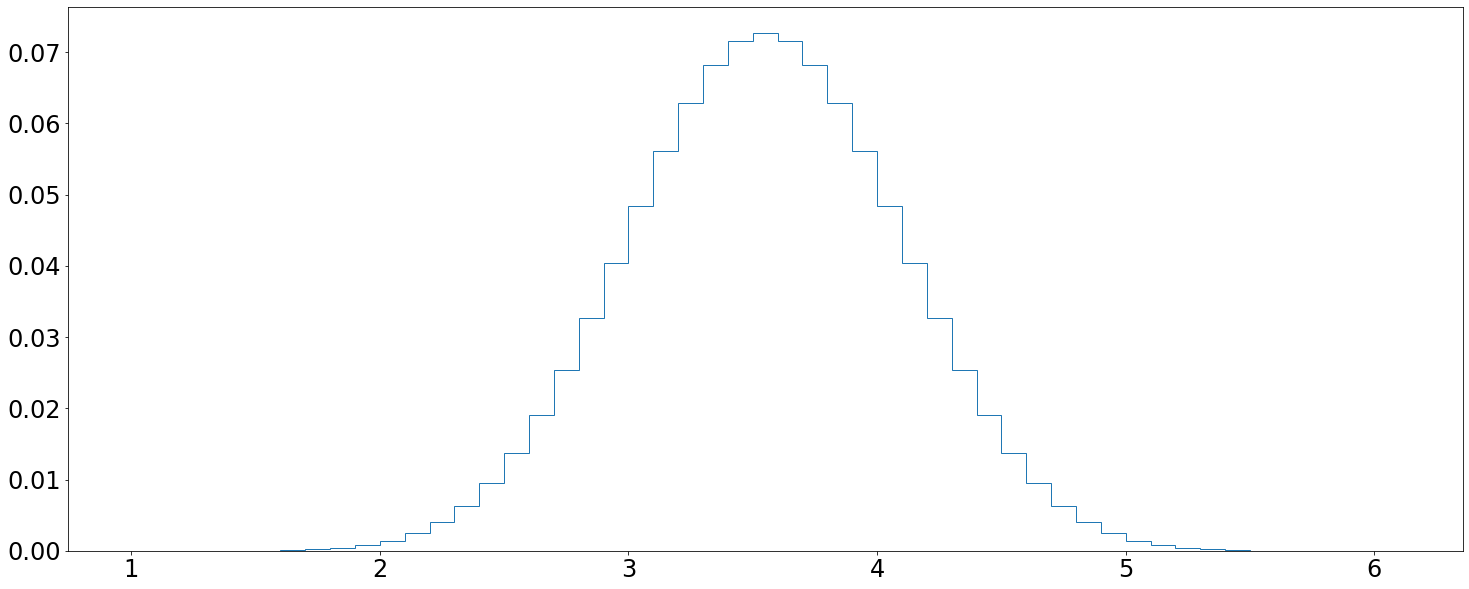

In [91]:
dice_df10 = stats.rv_discrete(values=(dist_x,sum_prob10))
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)
ax.stairs(sum_prob10, graph_x)

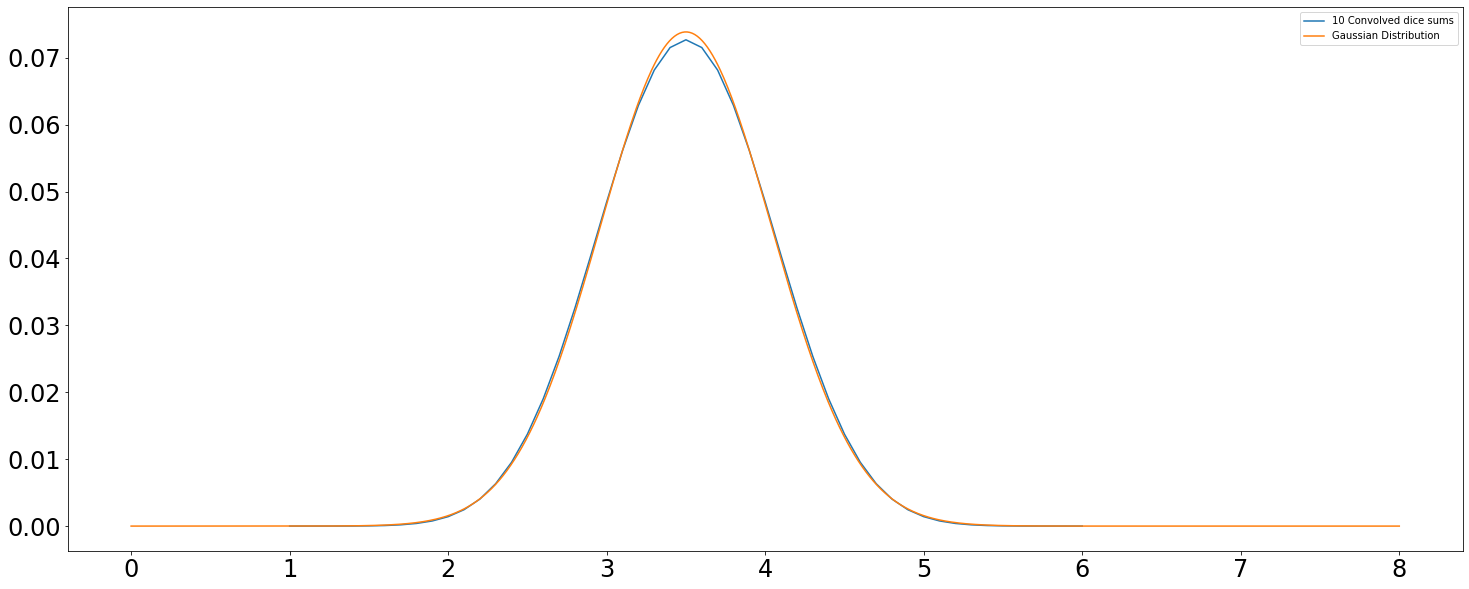

In [109]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)
ax.plot(dist_x, sum_prob10, label='10 Convolved dice sums')
x = np.linspace(0,8,1000)
plt.plot(x, stats.norm.pdf(x,loc=dice_df10.mean(),scale=dice_df10.std()) / 10, label='Gaussian Distribution')
plt.legend()

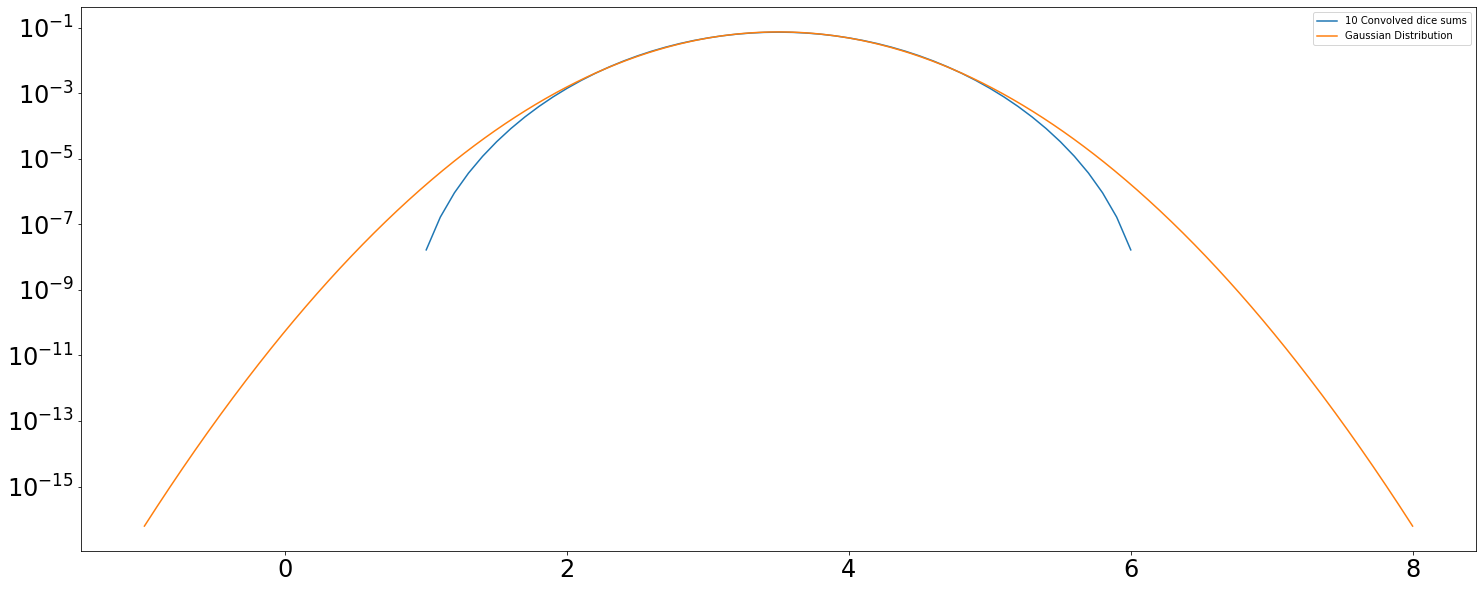

In [111]:

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)
ax.plot(dist_x, sum_prob10, label='10 Convolved dice sums')
x = np.linspace(-1,8,1000)
plt.plot(x, stats.norm.pdf(x,loc=dice_df10.mean(),scale=dice_df10.std()) / 10, label='Gaussian Distribution')
plt.legend()
plt.yscale('log')

Problem 4

By looking at the non step plot of the convolved 10 dice sum, with a gaussian distribution, the distribution seems to clearly follow a gaussian distribution for most everwhere except near the mean. However when looking at the log scale, the distribution for the sum of 10 dice diverges from the gaussian fairly quickly. The Central Limit tells us than most distributions will become a gaussian distribution when convolved enough times. The shape of the distribution is very close to a gaussian, and a gaussian could be used to estimate properties of the 10 dice sum, but it is clearly not a guassian, and a greater number of convolutions would be needed before this distribution would become a gaussian. Gaussian distributions, are also continuous, whereas the sum of 10 dice is a discrete distribution, so even if it held the shape of a gaussian distribution, a gaussian distribution would never fully represent the sum of 10 dice.

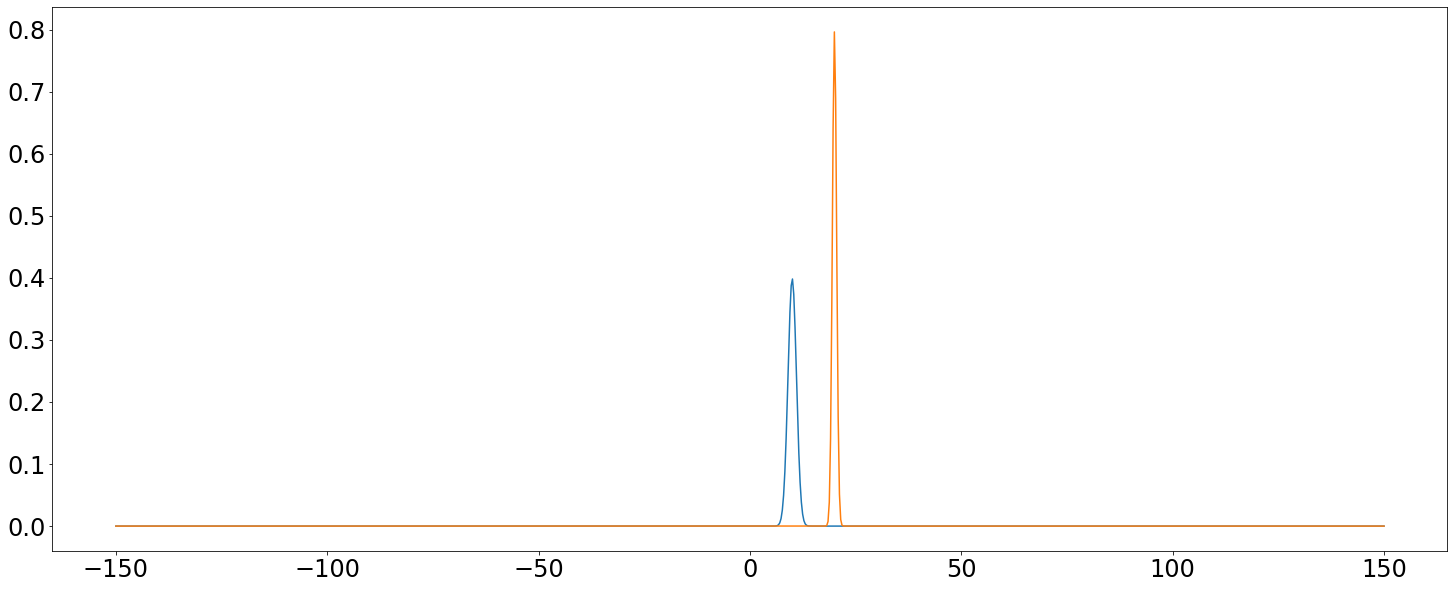

In [144]:
# Problem 5

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)
x = np.linspace(-150, 150, 1000)
ax.plot(x, stats.norm.pdf(x, loc=10, scale=1))
ax.plot(x, stats.norm.pdf(x, loc=20, scale=0.5))

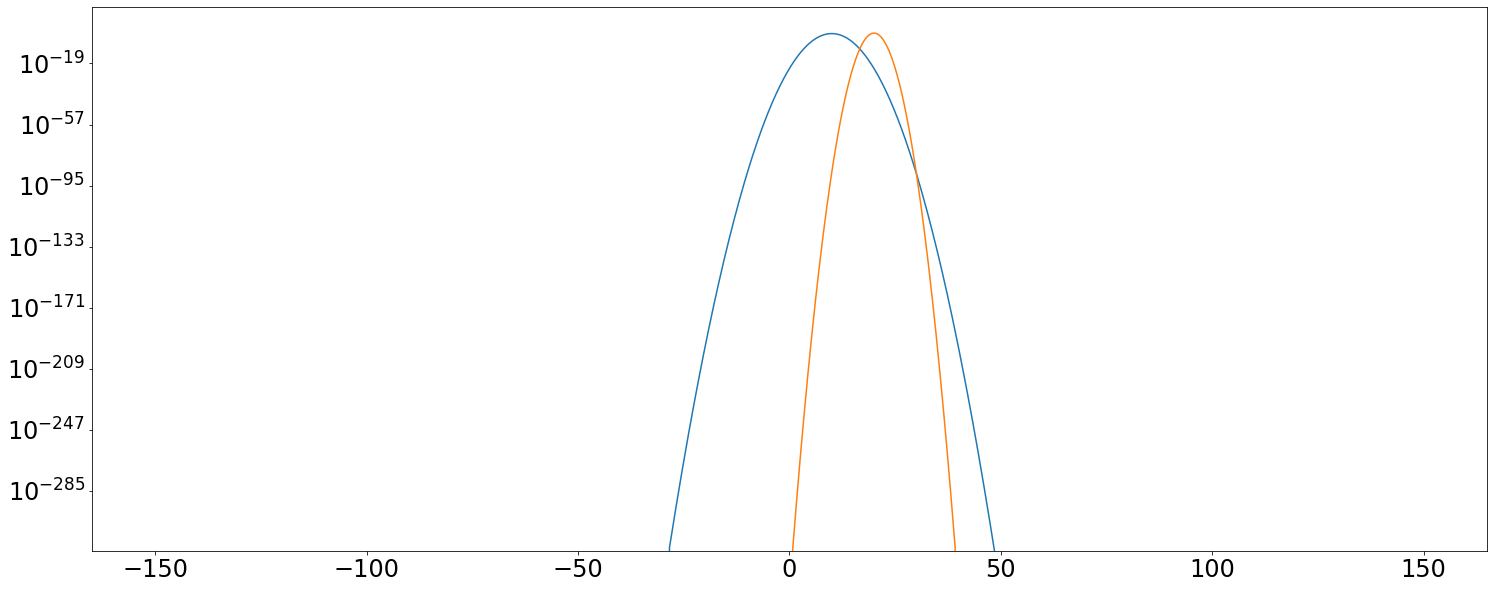

In [145]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)
plt.yscale('log')
ax.plot(x, stats.norm.pdf(x, loc=10, scale=1))
ax.plot(x, stats.norm.pdf(x, loc=20, scale=0.5))

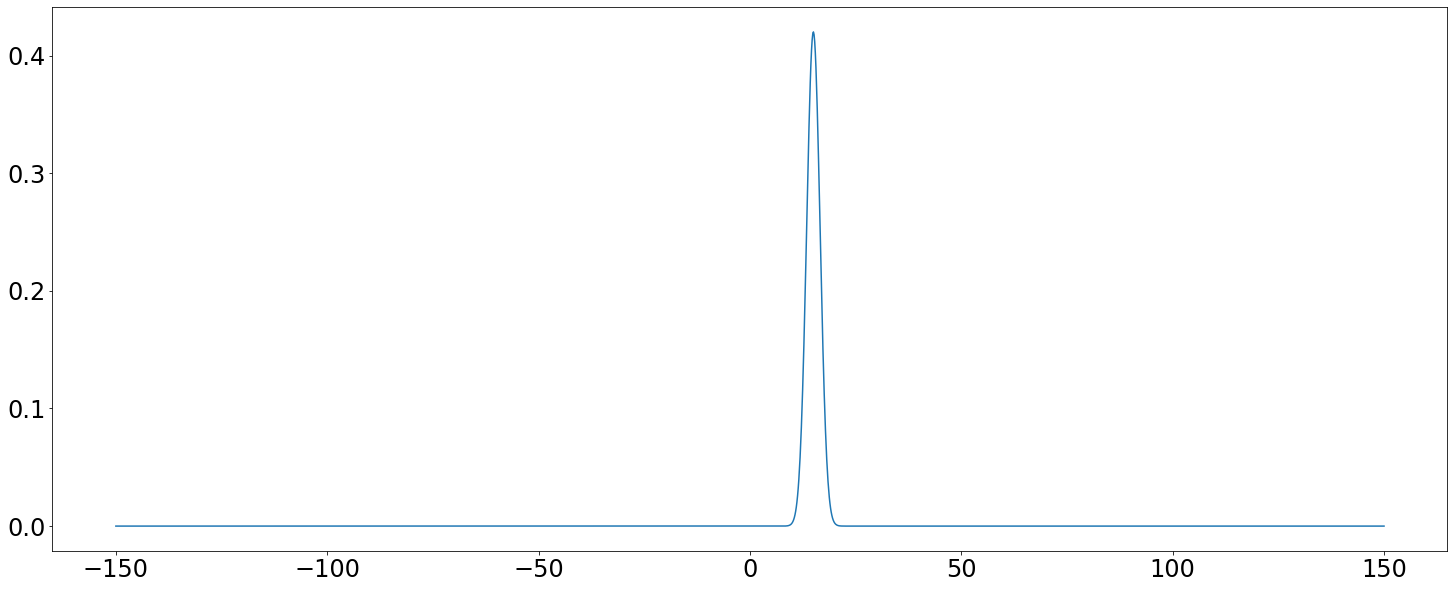

In [142]:
convolve_gauss = np.convolve(stats.norm.pdf(x, loc=10, scale=3), stats.norm.pdf(x, loc=20, scale=1))
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)
x_conv= np.linspace(-150,150, len(convolve_gauss))
ax.plot(x_conv, convolve_gauss)

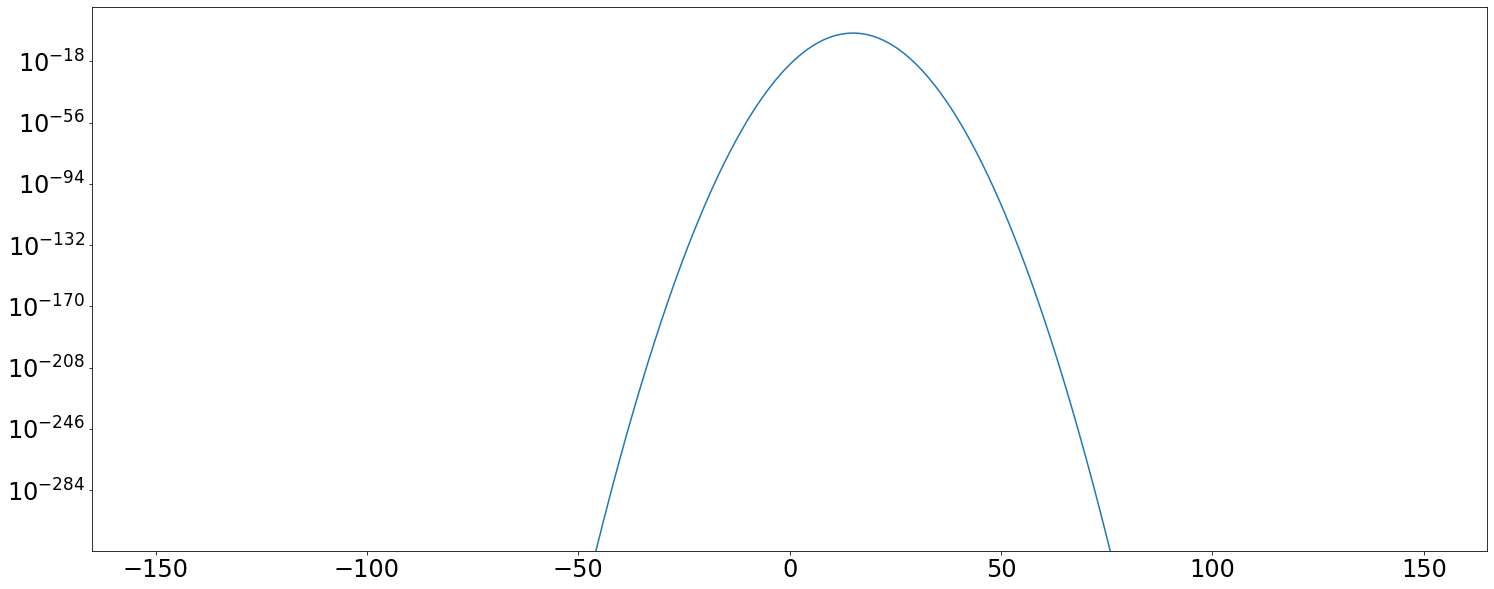

In [143]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)
ax.plot(x_conv, convolve_gauss)
plt.yscale('log')

Problem 5

The first two plots in the ones above show two gaussian ditributions with various means and variances plotted, along with the log scale to further show the shape of the gaussian. The final two plots, are of those same ditributions convolved together. It can be seen that both in the log scale, and in the regular scale, the convolution of the two plots holds the shape of a gaussian. In the case of the log scale the shape of the gaussian is still held at extremely small values, proving that a gaussian convolved with a gaussian is still a gaussian.